# Masking


In [37]:
from skimage.morphology import skeletonize, dilation, opening, square, disk
from skimage.morphology import skeletonize, dilation, erosion, opening, closing, square, disk
from skimage.morphology import remove_small_holes, remove_small_objects # for filling the holes and denoising
import matplotlib.pyplot as plt

import numpy as np
import math
from skimage import io


from skimage.filters import threshold_mean#for binarising
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu, threshold_minimum, threshold_triangle, threshold_mean, threshold_li


# For watershed
from scipy import ndimage as ndi#for distance
from skimage.feature import peak_local_max 
from skimage.segmentation import watershed 
from skimage import measure #measure objects


# For converting RGB to LAB
from skimage.color import rgb2lab

#for max & min filter
from skimage.morphology import disk, ball
from skimage.filters.rank import mean, maximum, minimum 
from skimage import img_as_ubyte as byte_convo #Convert an image to unsigned byte format, with values in [0, 255].


In [38]:
def get_image(name):
    """ Using the skimage.io import the image with the file name.
    This function returns the gray image as numpy array """
    
    #Getting the image  
    #filename = '../Images/'+name
    filename = name
    image_gray = io.imread(filename, as_gray = True) 
    image_RGB = io.imread(filename, as_gray = False) 
    
    return image_gray, image_RGB

In [39]:
def show_image(image, label ="Image:", size=(6,2), cmap='viridis'):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=size)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap=cmap) 
    plt.show()

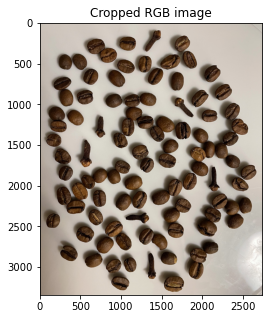

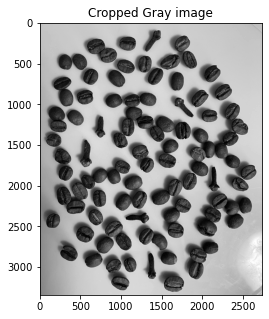

In [40]:
image_gray, image_RGB = get_image("coffeebeans.jpg")
# show_image(image, "Original Binary image")

#cropping the head
image_gray = image_gray[330:3670, 130:2860]    #[Row Y, COL, X]
image_RGB = image_RGB[330:3670, 130:2860]   #[Row Y, COL, X]

show_image(image_RGB, label ="Cropped RGB image", size=(10,5))
show_image(image_gray, label ="Cropped Gray image", size=(10,5), cmap='gray')

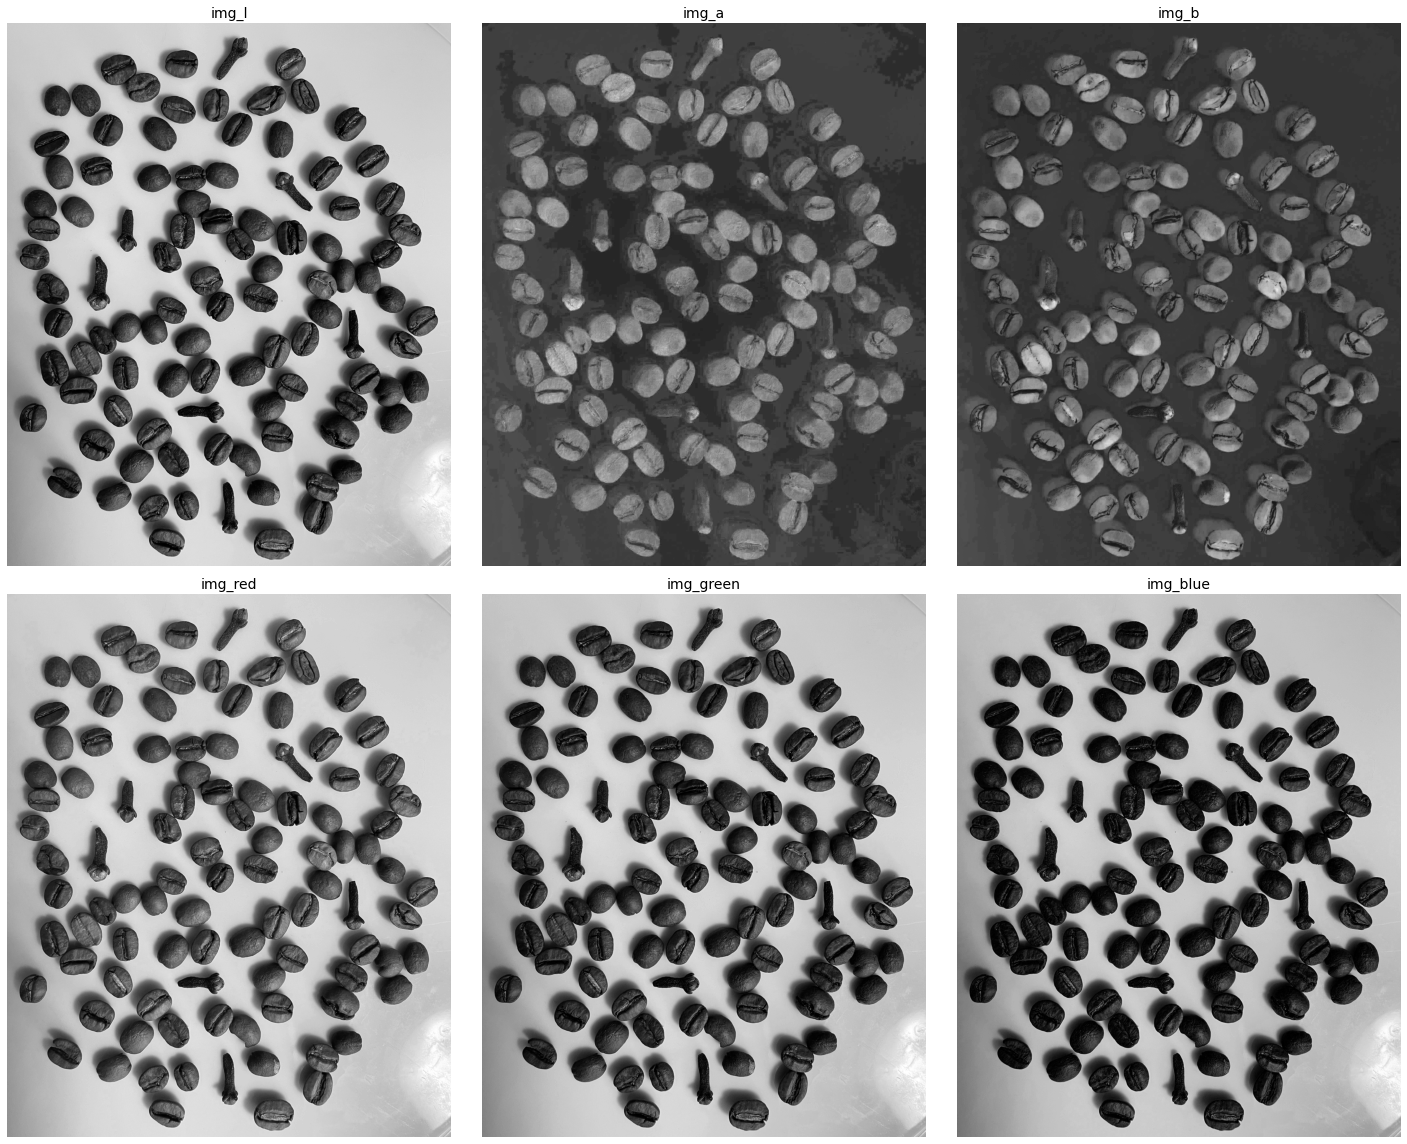

In [41]:
img_red = image_RGB [:,:,0] # pull out red channel
img_green = image_RGB [:,:,1] # pull out green channel
img_blue = image_RGB [:,:,2] # pull out blue channel



img_lab = rgb2lab(image_RGB)
img_l = img_lab[:,:,0] # pull out L channel
img_a = img_lab[:,:,1] # pull out A channel
img_b = img_lab[:,:,2] # pull out B channel

## Plotting the image
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 16))

ax[0,0].imshow(img_l, cmap='gray')
ax[0,0].set_title('img_l', fontsize = 14)

ax[0,1].imshow(img_a, cmap='gray')
ax[0,1].set_title('img_a', fontsize = 14)

ax[0,2].imshow(img_b, cmap='gray')
ax[0,2].set_title('img_b', fontsize = 14)


ax[1,0].imshow(img_red, cmap='gray')
ax[1,0].set_title('img_red', fontsize = 14)

ax[1,1].imshow(img_green, cmap='gray')
ax[1,1].set_title('img_green', fontsize = 14)

ax[1,2].imshow(img_blue, cmap='gray')
ax[1,2].set_title('img_blue', fontsize = 14)

for row in ax:
    for col in row:
        col.axis('off')

fig.tight_layout()
plt.show()

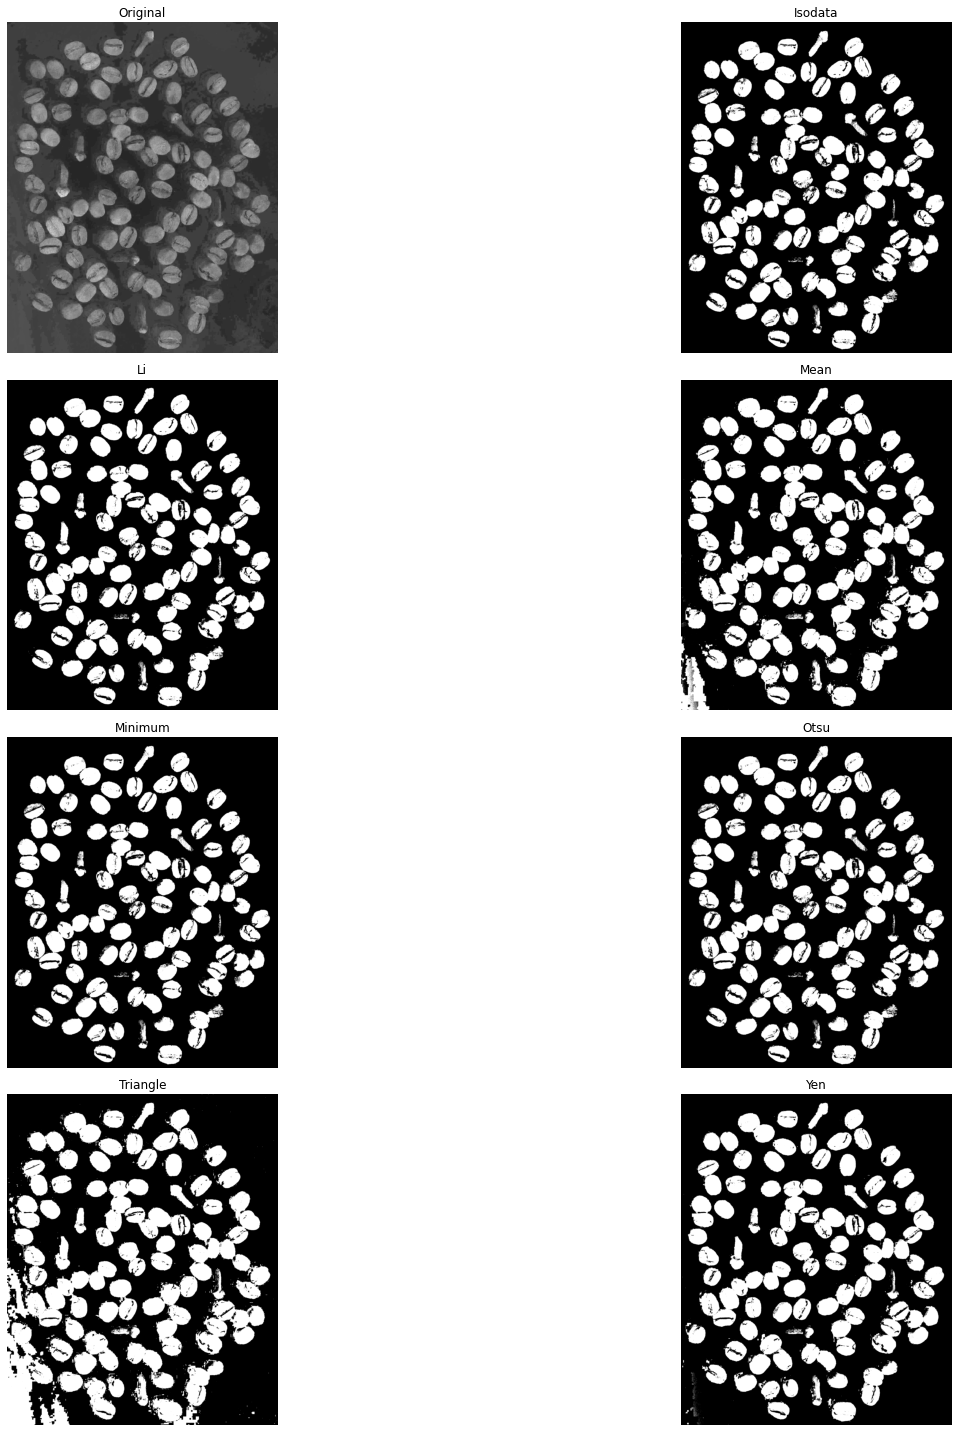

In [42]:
fig, ax = try_all_threshold(img_a, figsize=(25, 20), verbose=False)
plt.show()

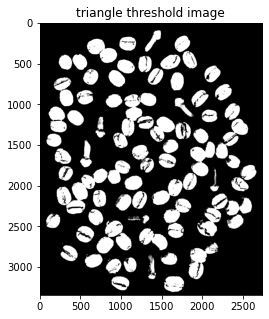

In [43]:
#binarising using triangle filter
thresh = threshold_li(img_a)
binary_triangle = img_a > thresh
show_image(binary_triangle, "triangle threshold image", (12,5), cmap='gray')

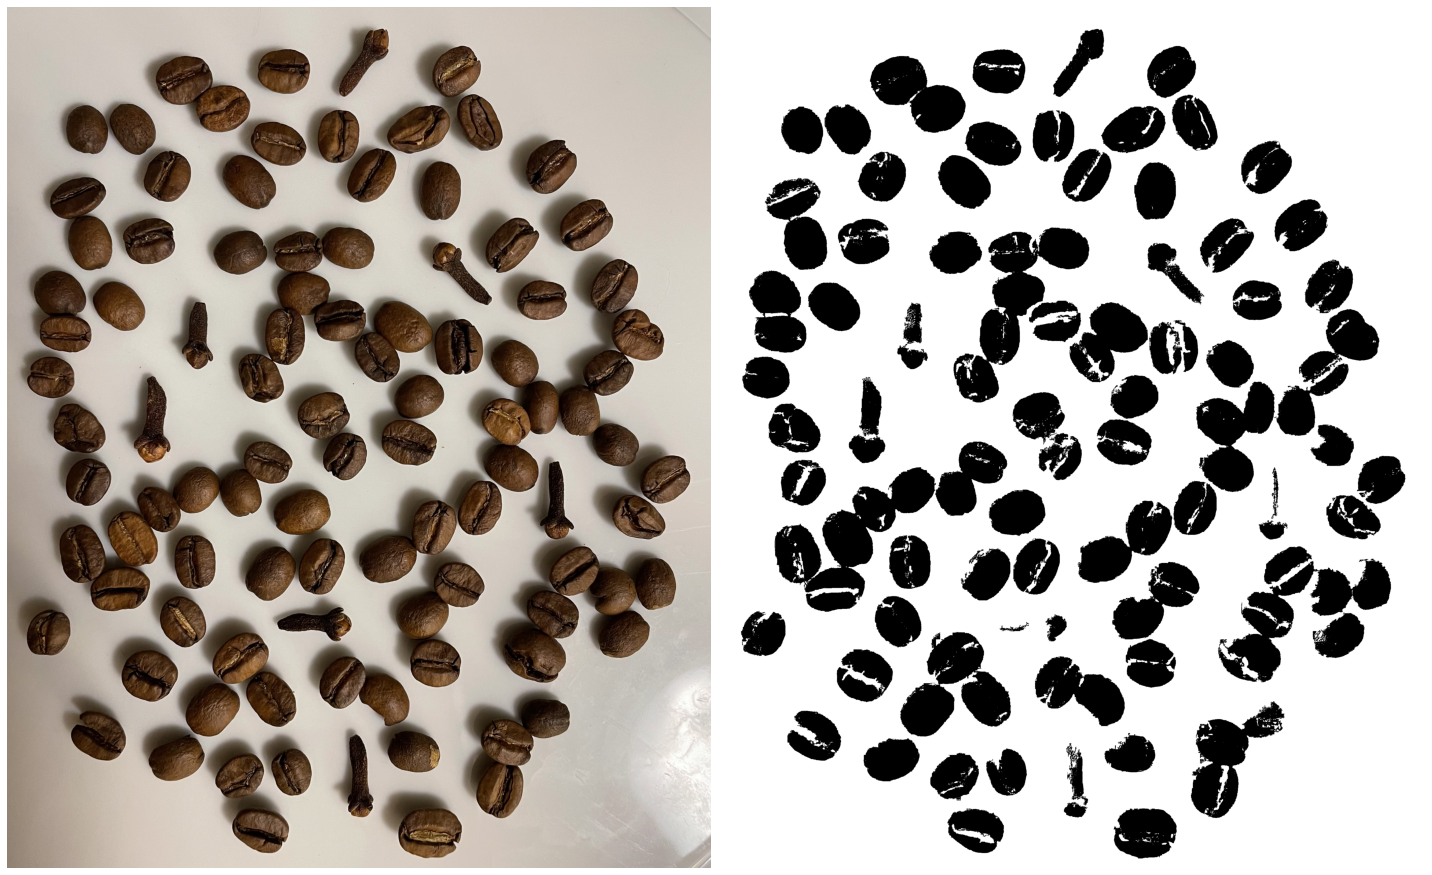

In [44]:
# fill holes
inverted_binary_triangle = np.invert(binary_triangle)
holes_filled = remove_small_holes(inverted_binary_triangle, area_threshold = 500)
# show_image(holes_filled, "filledholes_image", (20,10), cmap='gray')

## Plotting the image
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 16))

ax[0].imshow(image_RGB, cmap='gray')
# ax[0,0].set_title('img_l', fontsize = 14)

ax[1].imshow(holes_filled, cmap='gray')
# ax[1,0].set_title('img_red', fontsize = 14)

for row in ax:
    row.axis('off')

fig.tight_layout()
plt.show()

In [64]:
# holes_filled = np.invert(holes_filled)
mask = np.invert(holes_filled.copy())
for i in range(4):
    mask  = dilation(mask , disk(3))
for i in range(4):
    mask  = erosion(mask , disk(1))
    
mask = remove_small_holes(mask, area_threshold = 800)    
mask = np.invert(mask)*1.0



In [65]:
# # Creating mask
# # mask = np.invert(holes_filled)*1.0
# mask = (holes_filled.copy())*1.0
# show_image(mask, "mask", (12,5), 'gray')

In [66]:
print(mask.shape)

(3340, 2730)


(3340, 2730, 3)


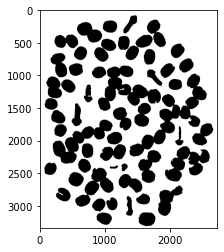

In [67]:
from skimage.color import gray2rgb
RGB_mask = gray2rgb(mask)
print(RGB_mask.shape)
plt.imshow(RGB_mask)

(3340, 2730, 3)
(3340, 2730, 3)


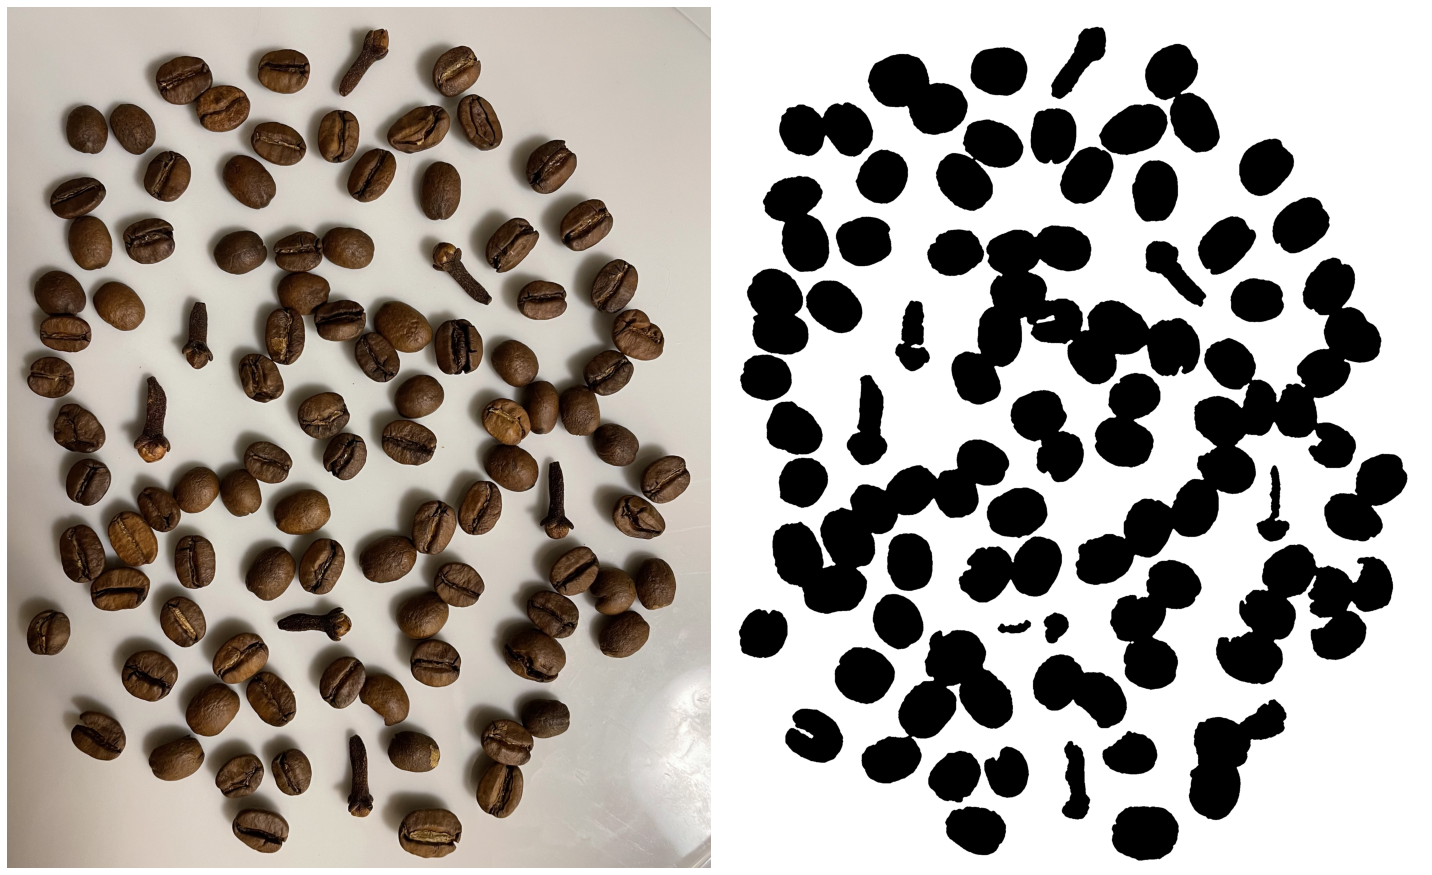

In [68]:
print(RGB_mask.shape)
print(image_RGB.shape)
masked_answer = image_RGB.copy()

## Plotting the image
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 16))

ax[0].imshow(masked_answer, cmap='gray')
# ax[0,0].set_title('img_l', fontsize = 14)

ax[1].imshow(RGB_mask, cmap='gray')
# ax[1,0].set_title('img_red', fontsize = 14)

for row in ax:
    row.axis('off')

fig.tight_layout()
plt.show()

In [69]:
shape = np.shape(RGB_mask)
for i in range(shape[0]):
    for j in range(shape[1]):
        a, b, c = RGB_mask[i, j]
        if (a == 1.0) and (b== 1.0) and (c==1.0):
            masked_answer[i, j] = [255, 255, 255] 

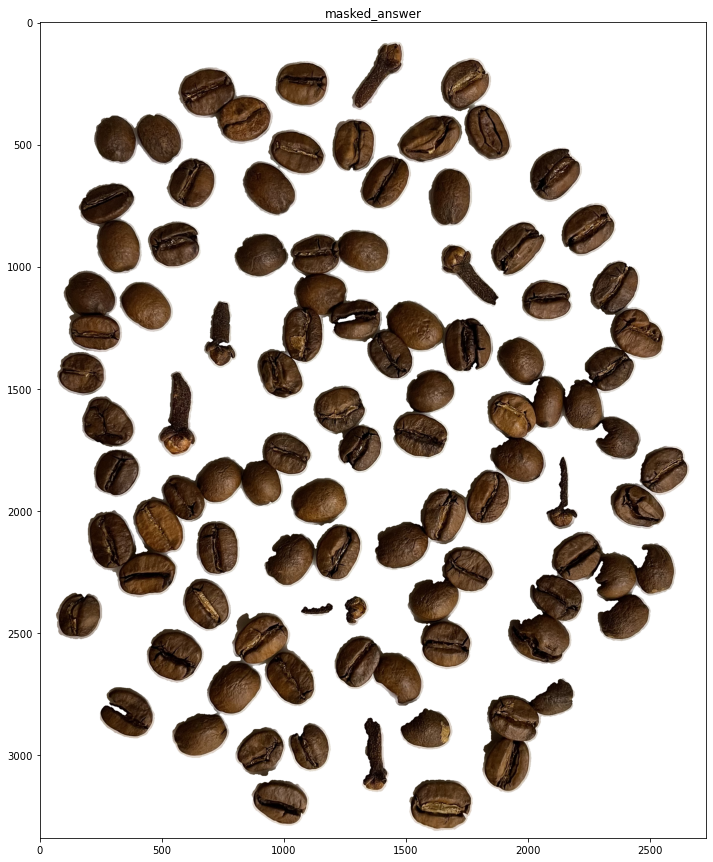

In [70]:
show_image(masked_answer, "masked_answer", (20,15))

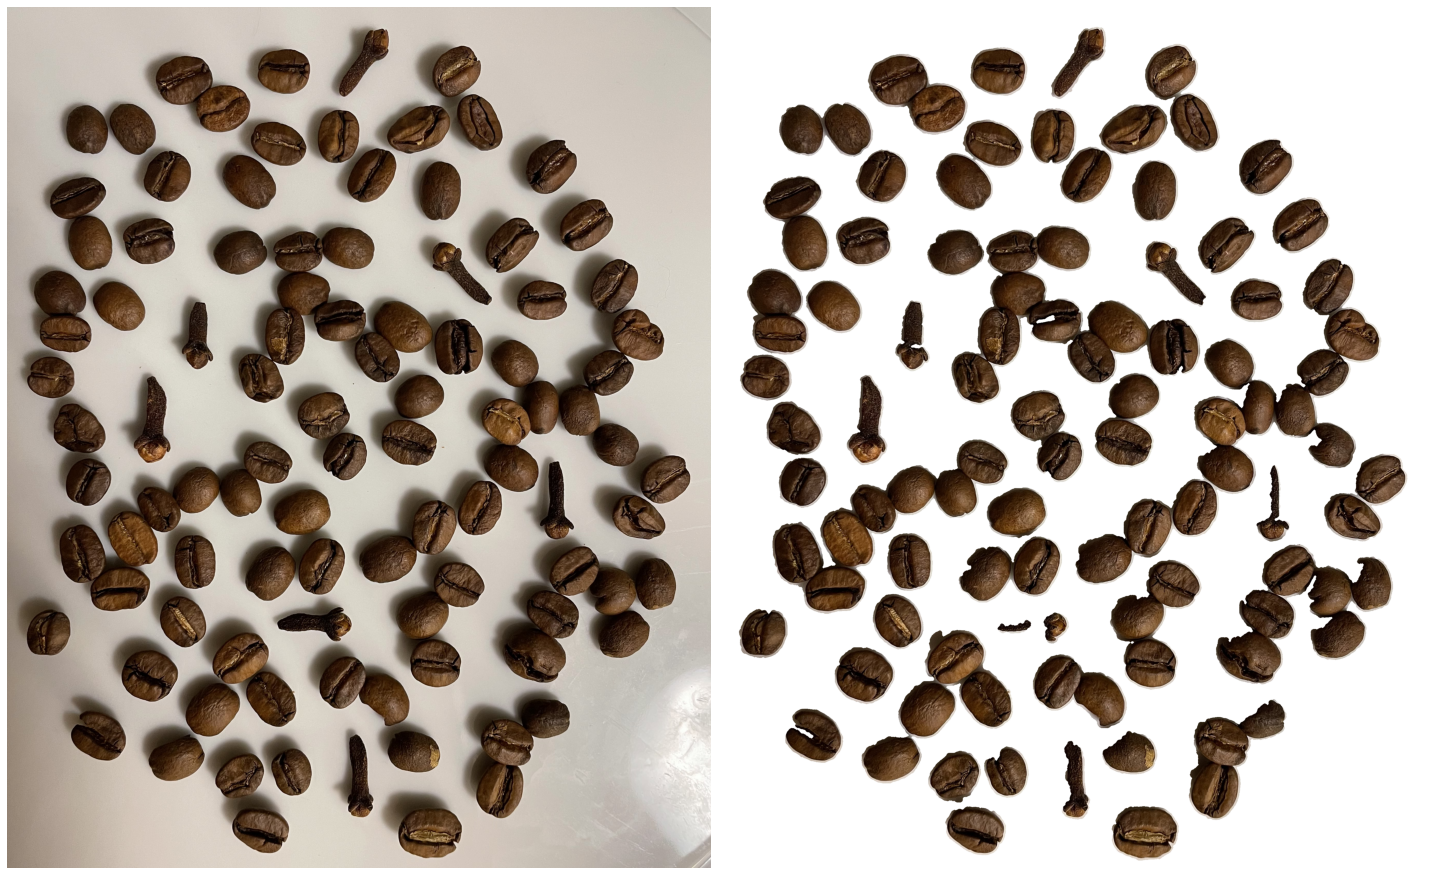

In [71]:
## Plotting the image
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 16))

ax[0].imshow(image_RGB, cmap='gray')
# ax[0,0].set_title('img_l', fontsize = 14)

ax[1].imshow(masked_answer, cmap='gray')
# ax[1,0].set_title('img_red', fontsize = 14)

for row in ax:
    row.axis('off')

fig.tight_layout()
plt.show()

# Masking in Image J
- image- type- 8 bit - adjust- triangle- autothreshold- 
- edit-invert [Fill holes ONLY WORKS WHEN THE OBJECT IS WHITE]
- process-binary-fill holes 
- edit-invert [For masking objects needs to be black/0]
- Process- image- calculator - Original Color image(image1) OR Mask (image2) 